In [1]:
import pandas as pd  
import numpy as np  
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
df = pd.read_csv('../data/twitter16m.csv', encoding='latin1', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df = df[[5, 0]]

In [4]:
df.columns = ['tweets', 'sentiments']
df.head()

,tweets,sentiments
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [5]:
df['sentiments'].value_counts()

0    800000
4    800000
Name: sentiments, dtype: int64

In [6]:
sent_map = {0: 'negative', 4: 'positive'}

In [7]:
# word counts
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split()))

In [8]:
df.head()

,tweets,sentiments,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


In [9]:
# character counts
df['char_counts'] = df['tweets'].apply(lambda x: len(x))

In [10]:
df.head()

,tweets,sentiments,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


In [11]:
# Average word length
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)
    
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x))

In [12]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [13]:
# Stop words count
print(STOP_WORDS)

{'herein', 'anyone', 'no', 'back', 'first', 'did', "n't", 'latterly', "'d", 'empty', 'often', 'and', 'put', 'where', 'myself', 'because', 'might', 'the', 'yours', 'perhaps', '’d', 'ever', 'may', 'well', 'your', 'upon', 'several', '‘d', 'ourselves', 'rather', 'give', 'another', 'beforehand', '’ve', 'therein', 'anyway', 'does', 'once', 'though', 'towards', 'own', 'just', 'for', 'keep', 'he', 'than', 'sometimes', 'have', 'whereas', 'amount', 'top', '‘s', 'themselves', 'wherever', 'whatever', 'whoever', 'doing', 'less', 'further', 'whole', 'so', 'being', 'together', 'any', 'wherein', 'almost', "'ll", 'otherwise', 'nevertheless', 'thence', 'anything', 'part', 'fifty', 'when', 'beside', 'say', 'using', 'noone', 'everything', 'somehow', "'m", 'over', 'via', 'could', 'meanwhile', 'herself', 'i', 'why', 'something', 'seemed', 'as', 'do', 'while', 'him', 'done', 'those', 'elsewhere', 'someone', 'side', '’m', 'get', 'quite', 'was', 'who', 'its', 'itself', 'our', 'onto', 'too', 'down', 'in', 'ther

In [14]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [15]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


In [16]:
# count #hash tags and @mentions
x = 'this is #hashtag and this is @mention'
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [17]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [18]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


In [19]:
# if numeric digits are present in tweets 
df['numeric_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t .isdigit()]))

In [20]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


In [21]:
# upper case words count
df['upper_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [22]:
# Preprocessing and cleaning
# Lower case convertion
df['tweets'] = df['tweets'].apply(lambda x: x.lower())
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [23]:
# contraction to expansion 
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [24]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [25]:
x = "i don't know what you want, can't, he'll, i'd"
cont_to_exp(x)

'i do not know what you want, cannot, he will, i would'

In [26]:
%%time 
df['tweets'] = df['tweets'].apply(lambda x: cont_to_exp(x))

Wall time: 20.2 s


In [27]:
# count and remove emails
import re

In [28]:
x = 'hi this is email email1@email.com another email another_email@email.com'
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', x)

['email1@email.com', 'another_email@email.com']

In [29]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', x))

In [30]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [31]:
df[df['emails_count']>0].head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [32]:
# remove emails
print(x)
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', '', x)

hi this is email email1@email.com another email another_email@email.com


'hi this is email  another email '

In [33]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', '', x))

In [34]:
df[df['emails_count']>0].head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [35]:
# count urls and remove it
x = 'hi check my blog https://blog.com/blog'

In [36]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'blog.com', '/blog')]

In [37]:
df['urls_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [38]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

'hi check my blog '

In [39]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [40]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [41]:
# Remove retweets RT
df['tweets'] = df['tweets'].apply(lambda x: re.sub('RT', '', x))

In [42]:
# Remove special characters
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [43]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [44]:
# remove multiple spaces "   "
x = 'thanks for     going   through the   code'
' '.join(x.split())

'thanks for going through the code'

In [45]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join(x.split()))

In [46]:
# Remove HTML tags
from bs4 import BeautifulSoup # web scraping

In [47]:
x = '<html><h2>Thanks for your support</h2></html>'
BeautifulSoup(x, 'html').get_text()

'Thanks for your support'

In [48]:
%%time 
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'html').get_text())

Wall time: 4min 55s


In [52]:
# Remove Accented characters, like 'Áccěntěd těxt'
x = 'Áccěntěd těxt'

In [53]:
import unicodedata

In [54]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [55]:
remove_accented_chars(x)

'Accented text'

In [56]:
df['tweets'] = df['tweets'].apply(lambda x: remove_accented_chars(x))

In [57]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [58]:
# SpaCy and NLP
# Remove stop words
x = 'this is stop words removal code'

In [59]:
' '.join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [60]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [61]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [62]:
#convert into a base or root form of word
nlp = spacy.load('en_core_web_sm')

In [63]:
# dive = dived, time = times, manage = managed

In [64]:
x = 'kenichan dived times ball managed save 50 rest'

In [65]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(' '.join(x_list))

In [66]:
make_to_base(x)

In [67]:
#%%time  This is too much time taking process.
#df['tweets'] = df['tweets'].apply(lambda x: make_to_base(x))

In [51]:
# common words removal
' '.join(df.head()['tweets'])

'switchfoot - awww that is a bummer you shoulda got david carr of third day to do it d is upset that he cannot update his facebook by texting it and might cry as a result school today also blah kenichan i dived many times for the ball managed to save 50 the rest go out of bounds my whole body feels itchy and like its on fire nationwideclass no it is not behaving at all i am mad why am i here because i cannot see you all over there'

In [68]:
text = ' '.join(df['tweets'])

In [69]:
text = text.split()

In [70]:
freq_comm = pd.Series(text).value_counts()

In [75]:
f_20 = freq_comm[:20] # first 20 frequently occured words
f_20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [76]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f_20]))

In [77]:
# Rare words removal
rare_20 = freq_comm[-20:]
rare_20

moriahmalonzo               1
sammiee87                   1
ircheryl                    1
party-ed                    1
dsc-v1                      1
sillay                      1
noaptea                     1
mschechter                  1
kumi666                     1
hellzy                      1
mortimers                   1
sabrinabot                  1
prayng                      1
piperxp                     1
wwwarmyofcaterpillarscom    1
boyshome                    1
quotieves                   1
jimbotown                   1
dip-book                    1
miori                       1
dtype: int64

In [78]:
rare = freq_comm[freq_comm==1]
rare

quotselamat    1
apey           1
ac3            1
melana         1
skytzmatic     1
              ..
boyshome       1
quotieves      1
jimbotown      1
dip-book       1
miori          1
Length: 536183, dtype: int64

In [79]:
# to remove the all rare words, it very time taking process
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare_20]))

In [80]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [81]:
# word cloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [83]:
x = ' '.join(text[:20000])

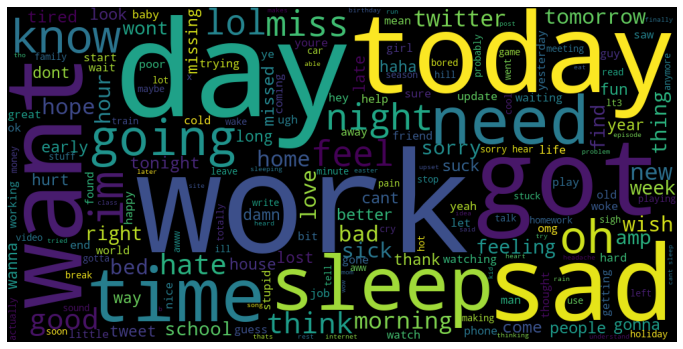

In [86]:
wc = WordCloud(width = 1000, height=500).generate(x)
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [87]:
# spelling correction
from textblob import TextBlob

In [94]:
x = 'thenks forr going throughf this codee or cade'

In [95]:
x = TextBlob(x).correct()
x

TextBlob("thanks for going through this code or made")

In [101]:
# Tokenization; converting text to tokens
x = 'thanks, for going. throught the code'

In [102]:
TextBlob(x).words

WordList(['thanks', 'for', 'going', 'throught', 'the', 'code'])

In [103]:
doc = nlp(x)
for token in doc:
    print(token)

thanks
,
for
going
.
throught
the
code


In [104]:
# Lemmatization
x = 'runs run running ran'

In [105]:
from textblob import Word

In [106]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [107]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


In [108]:
# Detect Entities using NER of SpaCy
# Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories. Some of the practical applications of NER include: Scanning news articles for the people, organizations and locations reported. Providing concise features for search optimization: instead of searching the entire content, one may simply search for the major entities involved. Quickly retrieving geographical locations talked about in Twitter posts.
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [109]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [110]:
from spacy import displacy

In [111]:
displacy.render(doc, style='ent')

In [112]:
# Detecting nouns
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


In [113]:
# Translation and language detection 
# Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php
tb = TextBlob(x)

In [114]:
tb.detect_language()

'en'

In [124]:
tb.translate(to='ar')

TextBlob("أخبار عاجلة: دونالد ترامب ، رئيس الولايات المتحدة يتطلع إلى توقيع صفقة لتعدين القمر")

In [125]:
# Use in build sentiment classifier

In [127]:
from textblob.sentiments import NaiveBayesAnalyzer

In [128]:
x = 'we all stand together to fight with corona virus. we will win together'

In [129]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [131]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [135]:
x = 'GDP is colapsed due to corona virus'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment
# it is classified as positive, though it is a negative. So it is better to train over own model with large dataset.

Sentiment(classification='pos', p_pos=0.6971077654516641, p_neg=0.3028922345483348)

In [136]:
# Advanced text processing, feature extraction
# N-Grams ; is the combination of multi words used together (N = 1 unigram, N = 2 bigram, N = 3 multigram, ....)
x = 'thanks for watching'

In [137]:
tb = TextBlob(x)

In [140]:
tb.ngrams(2), tb.ngrams(1), tb.ngrams(3)

([WordList(['thanks', 'for']), WordList(['for', 'watching'])],
 [WordList(['thanks']), WordList(['for']), WordList(['watching'])],
 [WordList(['thanks', 'for', 'watching'])])

In [141]:
# Bag of words (BOW)
# These model are the simplest model to extract the features from the text data. It creates the dictionary, then it put the count of the words in the dictionary for all the rows.
x = ['this is first sentence', 'this is second', 'this is last']

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
cv = CountVectorizer(ngram_range=(1, 1))
text_counts = cv.fit_transform(x)
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [145]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [157]:
bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [158]:
# Term frequency
# Term frequency (TF) often used in Text Mining, NLP, and Information Retrieval tells you how frequently a term occurs in a document. In the context of natural language, terms correspond to words or phrases. Since every document is different in length, it is possible that a term would appear more often in longer documents than shorter ones. Thus, term frequency is often divided by the total number of terms in the document as a way of normalization.
# TF(t) = The ratio of the count of a word present in a sentence, to the length of the sentence.

In [159]:
x

['this is first sentence', 'this is second', 'this is last']

In [160]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [161]:
bow.shape

(3, 6)

In [162]:
tf = bow.copy()

In [163]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [164]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


In [165]:
# Inverse document frequency (IDF)
# The word is not used much in the sentence get emphasised and the words used very frequently gets less emphasised
# idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True
#where, N is the total number of rows and n is the number of rows in which the word was present.
import numpy as np

In [166]:
x_df = pd.DataFrame(x, columns=['words'])
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [167]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [168]:
N = bow.shape[0]
N

3

In [169]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [170]:
bb['is'].sum()

3

In [171]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [172]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [173]:
nz

[1, 3, 1, 1, 1, 3]

In [174]:
idf = []
for i,  col in enumerate(cols):
    idf.append(np.log((N + 1) / (nz[i] + 1)) + 1)

In [175]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [177]:
bow, tf

(   first  is  last  second  sentence  this
 0      1   1     0       0         1     1
 1      0   1     0       1         0     1
 2      0   1     1       0         0     1,
    first        is      last    second  sentence      this
 0   0.25  0.250000  0.000000  0.000000      0.25  0.250000
 1   0.00  0.333333  0.000000  0.333333      0.00  0.333333
 2   0.00  0.333333  0.333333  0.000000      0.00  0.333333)

In [178]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [181]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [182]:
tfidf.idf_, idf

(array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
        1.        ]),
 [1.6931471805599454,
  1.0,
  1.6931471805599454,
  1.6931471805599454,
  1.6931471805599454,
  1.0])

In [183]:
# word embeddings ; Representation of text in the form of vectors 
# SpaCy word2Vec
nlp = spacy.load('en_core_web_lg')

In [193]:
doc = nlp('thank you! rat cat lion dvewvvs')

In [186]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
rat True
cat True
lion True
dvewvvs False


In [188]:
token.vector.shape

(300,)

In [190]:
nlp('cat').vector.shape

(300,)

In [196]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.56475854
thank ! 0.52147406
thank rat 0.11249656
thank cat 0.20648485
thank lion 0.13629761
thank dvewvvs 0.0

you thank 0.56475854
you you 1.0
you ! 0.4390223
you rat 0.20194353
you cat 0.3080798
you lion 0.20392051
you dvewvvs 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! rat 0.14460385
! cat 0.29702348
! lion 0.19601381
! dvewvvs 0.0

rat thank 0.11249656
rat you 0.20194353
rat ! 0.14460385
rat rat 1.0
rat cat 0.5321327
rat lion 0.35973576
rat dvewvvs 0.0

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat rat 0.5321327
cat cat 1.0
cat lion 0.52654374
cat dvewvvs 0.0

lion thank 0.13629761
lion you 0.20392051
lion ! 0.19601381
lion rat 0.35973576
lion cat 0.52654374
lion lion 1.0
lion dvewvvs 0.0

dvewvvs thank 0.0
dvewvvs you 0.0
dvewvvs ! 0.0
dvewvvs rat 0.0
dvewvvs cat 0.0
dvewvvs lion 0.0
dvewvvs dvewvvs 1.0

<ipython-input-196-ca330b4894ab>:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, to